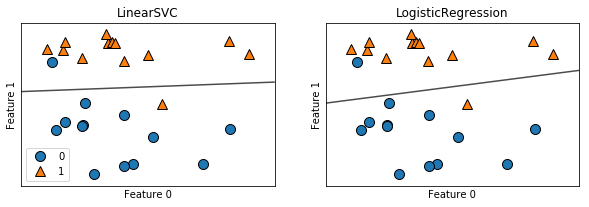

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X, y=mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

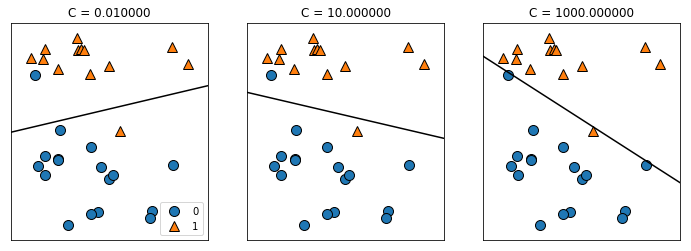

In [3]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print("Train score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg.score(X_test, y_test)))

Train score: 0.953
Test score: 0.958


In [7]:
#close scores on train and test indicate underfitting

In [8]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Train score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg100.score(X_test, y_test)))

Train score: 0.972
Test score: 0.965


In [9]:
#C=100 increased train and test - a more complex model improved accuracy

In [10]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("Train score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg001.score(X_test, y_test)))

Train score: 0.934
Test score: 0.930


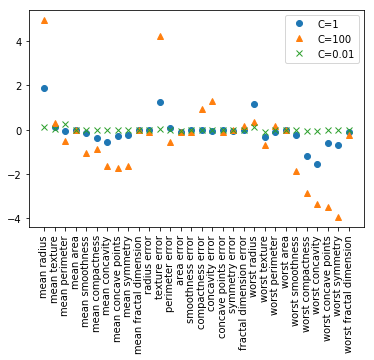

In [14]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T,'x',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.legend()
plt.show()